### Importing Packages and loading data

In [1]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import re
import gensim
from gensim.models import CoherenceModel, LdaModel, LsiModel
import matplotlib.pyplot as plt
import pandas as pd
###!python -m spacy download en_core_web_md
import spacy
nlp = spacy.load('/home/dsc/anaconda3/lib/python3.7/site-packages/en_core_web_md/en_core_web_md-2.2.0')

In [2]:
df_abstracts_year  = pd.read_csv("./papers_abstracts_year_published.csv")

In [3]:
df_abstracts_year.shape

(319821, 3)

In [6]:
df_abstracts_year.head()

,Publication Id,Publication Abstract,year
0,1117506301,Four types of calcined MCM-41 silica nanoparti...,2019.0
1,1117603937,First magnetic characterization of a recently ...,2019.0
2,1117505850,Metal oxide nanoparticles of different nature ...,2019.0
3,1120933764,The objective of this study is to identify bot...,2019.0
4,1117193292,A long-term multi-parameter skill assessment o...,2019.0


In [9]:
df_abstracts_year.groupby('year').count()

,Publication Id,Publication Abstract
year,,
2009.0,19550,19550
2010.0,21340,21340
2011.0,23914,23914
2012.0,26431,26431
2013.0,28527,28527
2014.0,30378,30378
2015.0,31308,31308
2016.0,32082,32082
2017.0,33286,33286


## Data Preprocessing

We set up a custom blacklist of words to be removed from the algorithm.

In [11]:
blacklist = ['http','objective','method','introduction','conclusion','result','xmlns'
             ,'paper','study','reference','background','perform','analysis','analyze','italic','xlink'] 

Now we can enrich the stopwords provided by ntlk with the additional ones included in our blacklist

In [12]:
stop = set(stopwords.words('english'))

additional_stopwords=set(blacklist)

stopwords = stop.union(additional_stopwords)

We now create a function to clean our abstracts, removing non alpha numeric characters,removing digits, duplicates..

In [13]:
def cleaner(word):
    word = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', '', word, flags=re.MULTILINE)
    word = re.sub(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', "", word)
    word = re.sub(r'\#\.', '', word)
    word = re.sub(r'\n', '', word)
    word = re.sub(r',', '', word)
    word = re.sub(r'\-', ' ', word)
    word = re.sub(r'\.{3}', ' ', word)
    word = re.sub('[^a-zA-Z]', ' ', word)
    list_word_clean = []
    for w1 in word.split(" "):
        if  w1.lower() not in stopwords:
            list_word_clean.append(w1.lower())

    bigram_list = bigram[list_word_clean]
    out_text = lemmatization(" ".join(bigram_list))
    return out_text

We now create a function to keep only nouns, so we remove verbs, adverbs, adjctives. This will help us to identify more meaninful topics in our abstracts.

In [14]:
def lemmatization(texts, allowed_postags=['NOUN']):
    texts_out = [ token.text for token in nlp(texts) if token.pos_ in 
                 allowed_postags and token.text not in blacklist and len(token.text)>2]
    return texts_out

We need to convert our Publication Abstract dataframe column to a list to perform text transformations required for the model.

In [16]:
abstract_list = df_abstracts_year['Publication Abstract'].tolist()

We now look for bigrams in our data, this are pair of words that together would be more meaningful for the model, an example is Machine Learning

In [17]:
%%time
bigram = gensim.models.Phrases(abstract_list)

CPU times: user 21min 40s, sys: 180 ms, total: 21min 40s
Wall time: 21min 41s


Lets test our cleaner function.

In [19]:
cleaner(abstract_list[1000])

['prevalence',
 'severity',
 'caries',
 'year',
 'schoolchildren',
 'risk',
 'factors',
 'methods',
 'cross',
 'sample',
 'schoolchildren',
 'examination',
 'information',
 'health',
 'habits',
 'hygiene',
 'logistic',
 'regression',
 'model',
 'caries',
 'variables',
 'age',
 'group',
 'findings',
 'years',
 'teeth',
 'index',
 'dentition',
 'prevalence',
 'year',
 'group',
 'individuals',
 'teeth',
 'values',
 'gingival',
 'increase',
 'environment',
 'risk',
 'factor',
 'year',
 'group',
 'caries',
 'risk',
 'brushing',
 'day',
 'individuals',
 'clinics',
 'toothbrush',
 'caries',
 'risk',
 'conclusions',
 'risk',
 'factors',
 'caries',
 'differences',
 'year',
 'evidence',
 'caries',
 'year',
 'group',
 'frequency',
 'toothbrush',
 'time',
 'visit',
 'dentist',
 'type',
 'dental',
 'care',
 'association',
 'dental',
 'caries',
 'prevalence',
 'year',
 'spite',
 'improvement',
 'hygiene',
 'age']

In [20]:
len(abstract_list)

319821

In [21]:
%%time
processed_abstract = list(map(cleaner,abstract_list))
processed_abstract[:10]

CPU times: user 3h 24min 29s, sys: 13.5 s, total: 3h 24min 43s
Wall time: 3h 20min 52s


[['types',
  'silica',
  'nanoparticles',
  'dyes',
  'ensembles',
  'nanoparticles',
  'rhodamine',
  'poly',
  'ethylene',
  'glycol',
  'derivatives',
  'ester',
  'groups',
  'nanoparticles',
  'self',
  'derivatives',
  'ester',
  'moieties',
  'absence',
  'esterase',
  'enzyme',
  'cargo',
  'release',
  'nanoparticles',
  'release',
  'formation',
  'surface',
  'nanoparticles',
  'delivery',
  'presence',
  'esterase',
  'enzyme',
  'delivery',
  'rate',
  'character',
  'shell',
  'ethylene',
  'glycol',
  'derivatives',
  'access',
  'esterase',
  'ester',
  'moieties',
  'cargo',
  'release',
  'hand',
  'presence',
  'esterase',
  'enzyme',
  'access',
  'ester',
  'groups',
  'rate',
  'cargo',
  'release'],
 ['characterization',
  'generation',
  'carbide',
  'steels',
  'stability',
  'temperatures',
  'ray',
  'diffraction',
  'measurements',
  'morphologies',
  'type',
  'film',
  'type',
  'proportion',
  'chemical',
  'composition',
  'treatment',
  'inhibition',
  

Now we create the dictionary and corpus for our model.

In [22]:
dictionary = gensim.corpora.Dictionary(processed_abstract)
dictionary.compactify()
# Filter extremes
dictionary.filter_extremes(no_below=2, no_above=0.97, keep_n=None)
dictionary.compactify()

corpus = [dictionary.doc2bow(text) for text in processed_abstract]

## Creating our model

#### LDA model

For LDA we need to define a number of topics, we will start with 10 topics.

In [23]:
ldamodel_10 = gensim.models.LdaMulticore(corpus=corpus,
                                         num_topics=10, 
                                         id2word=dictionary, 
                                         passes=2,
                                         workers=2)

Creating a function to display the main topics.

In [24]:
def display_topics(model, model_type="lda"):
    for topic_idx, topic in enumerate(model.print_topics( num_words=20)):
        print ("Topic %d:" % (topic_idx))
        if model_type== "hdp":
            print (" ".join(re.findall( r'\*(.[^\*-S]+).?', topic[1])), "\n")
        else:
            print (" ".join(re.findall( r'\"(.[^"]+).?', topic[1])), "\n")

In [25]:
display_topics(ldamodel_10)

Topic 0:
species water areas climate results area data soil populations diversity distribution conditions patterns sites variability region change changes population period 

Topic 1:
brain results activity effects memory test differences effect muscle changes motor time pain subjects neurons stress exercise response age function 

Topic 2:
levels weight body results risk age samples diet obesity children blood resistance groups methods women food population intake strains studies 

Topic 3:
properties surface temperature results energy structure materials phase reaction model electron state formation nanoparticles effect field density measurements process material 

Topic 4:
patients treatment risk years disease methods results cancer cases months conclusions group age therapy diagnosis mortality patient survival surgery rate 

Topic 5:
research students results information knowledge article process development training studies language review group learning data education work litera

#### LSI Model

This model learns latent topics by performing a matrix decomposition (SVD) on the term-document matrix. We need also to select a number of topics. We will select also 10 as test.

In [26]:
lsimodel_10 = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [27]:
display_topics(lsimodel_10)  # Showing the topics

Topic 0:
patients results treatment risk years methods data time levels model age cell group disease cells studies factors conclusions response months 

Topic 1:
patients results model data time system species cells water cell conditions effect effects models energy process performance activity order properties 

Topic 2:
cells cell expression protein data model gene cancer levels genes activity results tumor time mice years role risk activation response 

Topic 3:
risk model patients age years women health factors children system studies cancer levels energy population water group systems temperature par 

Topic 4:
species model water data risk cells cell soil models treatment samples cancer conditions plant levels temperature activity effect effects system 

Topic 5:
species treatment model data risk results models time gene expression activity group energy effect patients system genes properties par distribution 

Topic 6:
risk model data water results par temperature species inform

Difficult to get meaningful topics from here, words are repeated across several topics. This could occur as we might have selected a high number of topics.

### Creating a graph to evaluate results

Let's now try to find the best number of topics for our LDA and LSI models.

For this we are going to use a function to display a graph that will help us to identify the best number of topics based on the coherence model

In [28]:
def evaluation_graph(dictionary, corpus, texts, limit, model):
    c_v = []
    lm_list = []
    for num_topics in range(1, limit):
        if model == 'lsi':
            lm = LsiModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        else:
            lm = gensim.models.LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=2, workers=2)
        lm_list.append(lm)
        cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v')
        c_v.append(cm.get_coherence())
        
    # Show graph
    x = range(1, limit)
    plt.plot(x, c_v)
    plt.xlabel("Number_topics")
    plt.ylabel("Coherence_score")
    plt.legend(("c_v"), loc='best')
    plt.show()
    
    return lm_list, c_v

Let's run our evaluation model graph to try to identify the best number of topics for our LSI and LDA models. This can take a long time to run.

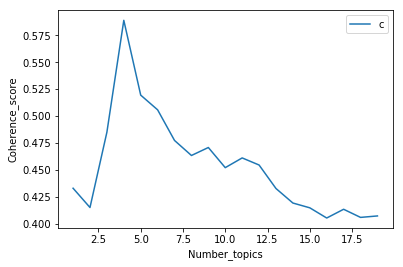

CPU times: user 42min 4s, sys: 3min 7s, total: 45min 11s
Wall time: 31min 3s


In [30]:
%%time
lmlist, c_v = evaluation_graph(dictionary=dictionary
                             , corpus=corpus
                             , texts=processed_abstract
                             , limit=20
                             , model= "lsi")

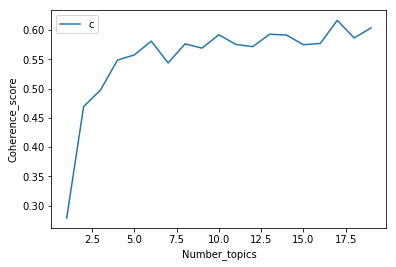

CPU times: user 2h 17min 23s, sys: 3min 23s, total: 2h 20min 46s
Wall time: 2h 13min 58s


In [31]:
%%time
lmlist, c_v = evaluation_graph (dictionary=dictionary
                               , corpus=corpus
                               , texts=processed_abstract
                               , limit=20
                               , model= "lda")

We see that for LSI model best number of topics seems to be 4. For LDA, as of 4 topics coherence score reaches similar score than the best LSI model and stabilizes, hence we will go for LDA.

In LDA evaluation graph, seems that 17 topics is the model with a higher high score reaching over 0.60. However, for simplicity we will take the model with 10 topics which gives one of the best scores and will be easier to understand due to the lower amount of topics.

Let's display again the 10 topics from our model.

In [32]:
display_topics(ldamodel_10)

Topic 0:
species water areas climate results area data soil populations diversity distribution conditions patterns sites variability region change changes population period 

Topic 1:
brain results activity effects memory test differences effect muscle changes motor time pain subjects neurons stress exercise response age function 

Topic 2:
levels weight body results risk age samples diet obesity children blood resistance groups methods women food population intake strains studies 

Topic 3:
properties surface temperature results energy structure materials phase reaction model electron state formation nanoparticles effect field density measurements process material 

Topic 4:
patients treatment risk years disease methods results cancer cases months conclusions group age therapy diagnosis mortality patient survival surgery rate 

Topic 5:
research students results information knowledge article process development training studies language review group learning data education work litera

Lets infer what the topics are going about.

 - Topic 0: Is about social-ecological research. ( Sustainability )
 - Topic 1: Is about brain and memory studies. ( Neuroscience )
 - Topic 2: Is about studies related to nutritition and diet and their effects. ( Nutrition )
 - Topic 3: Is about chemical and physics research. ( Pyshics )
 - Topic 4: Is about cancer studies on possible treatments. ( Oncology )
 - Topic 5: Is about countries and system education and development, ( Education and Developmental Science )
 - Topic 6: Is about data, models , algorithms ( Data Science & Machine Learning )
 - Topic 7: Is about cell and gene therapies. ( Cell & Genes Studies )
 - Topic 8: Is about medicine studies in difference groups of the society. ( Global Health & Medicine )
 - Topic 9: Is about studies related to chemical processes within and related to living organisms. ( Biochemistry )

#### Saving model

In [33]:
from gensim.test.utils import datapath

# Save model.
model_file_10 = datapath("model_lda_10")

ldamodel_10.save(model_file_10)

# Load model
# lda = LdaModel.load(temp_file_10)

### Assigning the topics created to each of our abstracts

Lets test which topic is assigned to one of our abstracts in the dataframe.

In [35]:
df_abstracts_year.head()

,Publication Id,Publication Abstract,year
0,1117506301,Four types of calcined MCM-41 silica nanoparti...,2019.0
1,1117603937,First magnetic characterization of a recently ...,2019.0
2,1117505850,Metal oxide nanoparticles of different nature ...,2019.0
3,1120933764,The objective of this study is to identify bot...,2019.0
4,1117193292,A long-term multi-parameter skill assessment o...,2019.0


In [37]:
unseen_abstract= df_abstracts_year.loc[df_abstracts_year['Publication Id'] == 1117603937]
new_abstract = unseen_abstract['Publication Abstract'].tolist()
new_abstract

['First magnetic characterization of a recently developed generation of carbide free bainitic steels, known as Nanobain, has been performed. Stability of its retained austenite at cryogenic temperatures has been studied by means of X-ray diffraction, microscopy, dilatometry and magnetic measurements. Two morphologies for this phase (blocky-type and film-type) appear in a different proportion depending on the chemical composition and the applied thermal treatment. Inhibition of the martensitic transformation, when decreasing the temperature down to -271°C, has been observed in those microstructures with higher proportion of film-type austenite. The paramagnetic state of austenite at room temperature seems to lead to different magnetic behaviors (ferromagnetic, antiferromagnetic) at cryogenic temperatures (TC or TN being around -23°C in all the studied samples), depending on the proportion of such morphological features. Furthermore, irreversibility with temperature on the evolution of s

In [39]:
new_abstract = str(new_abstract)
new_abstract = cleaner(new_abstract)
new_abs_bow = dictionary.doc2bow(new_abstract)
##print(new_doc_bow)
print(ldamodel_10.get_document_topics(new_abs_bow))

[(3, 0.8290606), (9, 0.14930247)]


Our model assigned topic 3 which is about Pyshics, looking at the abstract content seems to be a good assignment!

We will now iterate over our original dataframe to assing the topic with the highest score to each abstract. This will take a few hours to complete..

In [40]:
for index, row in df_abstracts_year.iterrows():
        abstract_to_list = row['Publication Abstract']
        process_abstr = cleaner(abstract_to_list)
        new_abstract_bow = dictionary.doc2bow(process_abstr)
        topic_scores = (ldamodel_10.get_document_topics(new_abstract_bow))
        max_topic_score = max(topic_scores,key=lambda item:item[1])[0]
        df_abstracts_year.loc[index,'Assigned Topic'] = max_topic_score        

In [41]:
df_abstracts_year.head()

,Publication Id,Publication Abstract,year,Assigned Topic
0,1117506301,Four types of calcined MCM-41 silica nanoparti...,2019.0,3.0
1,1117603937,First magnetic characterization of a recently ...,2019.0,3.0
2,1117505850,Metal oxide nanoparticles of different nature ...,2019.0,3.0
3,1120933764,The objective of this study is to identify bot...,2019.0,8.0
4,1117193292,A long-term multi-parameter skill assessment o...,2019.0,6.0


In [42]:
len(df_abstracts_year)

319821

We have got our dataframe with the topics assigned. Lets copy it to a csv file

In [43]:
df_abstracts_year.to_csv("./papers_abstracts_year_topics.csv", sep=',', index=False )